<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v1</h1>

Hello Hardstyle!

I'm happy to review your project today 🙌

My name is **Justino Imbert** ([this](https://hub.tripleten.com/u/125e88ae) is my Hub profile) and today I'll be reviewing your project!


You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work cant be accepted with the red comments
</div>

Please dont remove my comments :) If you have any questions dont hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Hey Hardstyle, I'm very happy to review another of your projects!

I've seen your code and what you are doing is awesome!
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

Please make the change mentioned in the red markdown cell so we can continue with the analysis!
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Looking forward to reviewing your next submission!
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2:</b> </a>

It's great to review your new submission! I believe that after fixing the problem with the missing values we can continue with the entire dataset and rely on the graphs! you build!

Take into account we care about sales, genre and regions trends, so removing 50%+ of the rows can skew our analysis and therefore our conclusions too!

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Looking forward to reviewing your next submission!

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

Hey you are doing an awesome job! your submission is looking awesome overall!

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v3:</b> </a>

I would love to see you define precisely the hypotheses before approving this submission, within comments or in your code !

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

Looking forward to reviewing your next submission! you are almost there!

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v4:</b> </a>

Submission looking awesome!

Happy to see you continue progressing! looking forward to your next submission, this one is approved!

Good luck!
    
</div>

# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

My Hypothesis Is That Crtic Score Will Play A Larger Role, Based On The Optics That People Regard With More Respect Because Of The Projected Unbias Opinion. Western Sales Will Be Geared Towards More Mature Audiences, And Japanese Towards More Wholesome Fun. I Would Expect The Consoles With The Most Advanced Technologgy To Always Be Leading. I Would Like To See The Prices Of The Consoles Relative To The Time Because Covenience Of Access Plays A Big Role. I Know Its Not Possible, But Seeing How Sales Are Spread Across Different Economic Status Would Be Interesting To Help Base What Games To Sell Based On Spcific Areas. Areas Of Poverty VS Areas Of Abundance.

In [1]:
# Import all required libraries
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st 
import seaborn as sns

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
# Load the dataset
games_df = pd.read_csv('/datasets/games.csv')

In [3]:
# Display basic information about the dataset
print(games_df.head(5))


                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [4]:
# Check for duplicate entries
games_df.duplicated()

#Check True
duplicated = games_df[games_df.duplicated()]

print(duplicated)

Empty DataFrame
Columns: [Name, Platform, Year_of_Release, Genre, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score, Rating]
Index: []


### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [5]:
# Convert column names to lowercase
games_df.columns = games_df.columns.str.lower()

In [6]:
# Verify the changes
print(games_df.head(5))

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Awesome job!
    
</div>

### 2.2 Data Type Conversion

In [7]:
# Check current data types
games_df.info()
print(games_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
(16715, 11)


In [8]:
# Make changes to data types if necessary
games_df['year_of_release'] = pd.to_numeric(games_df['year_of_release'], errors='coerce').astype('Int64')
games_df['critic_score'] = pd.to_numeric(games_df['critic_score'], errors='coerce').astype(float)

games_df.info()
# Describe the columns where the data types have been changed and why.
print('Changed critic_score To Float Because I MIght Need To Find The Mean Or Median Later')
print("Changed year_of_relaese To Int Because Years Aren't Decimals")

games_df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB
Changed critic_score To Float Because I MIght Need To Find The Mean Or Median Later
Changed year_of_relaese To Int Because Years Aren't Decimals


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E


In [9]:
#I Used The Line Below To Search All The Columns
games_df['user_score'].unique()[:40]

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8'],
      dtype=object)

In [10]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
print("Ive Searched All The Columns And Decided To Turn Into NaN Value Because It's Essentially The Same. its A Factor I Can't Incorporate Unless Tracking Specifically How 'tbd' Correlates To Sales")
#Changing To Numeric Will Convert 'tbd' To NaN Value
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce').astype(float)


Ive Searched All The Columns And Decided To Turn Into NaN Value Because It's Essentially The Same. its A Factor I Can't Incorporate Unless Tracking Specifically How 'tbd' Correlates To Sales


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Looking good!
    
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b> </a>

The TBD values could be found in the critic_score and user_score column, you weren't able to find those because you erased converted the columns to numeric!
    
</div>

### 2.3 Handling Missing Values

In [11]:
# Examine missing values
games_df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [12]:
# Calculate percentage of missing values
missing_percent = (games_df.isnull().sum() / len(games_df)) * 100
print(missing_percent)

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64


Largest Emerging Pattern Stems From Japnsese Top Platforms
Significant Rise In Missing Values After 1994
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64
DS      1687
PS      1047
PS2     1021
Wii      841
PSP      819
GBA      585
PS3      562
X360     404
3DS      365
PC       322
N64      319
PSV      312
XB       259
SNES     239
GC       208
SAT      173
PS4      153
2600     133
GB        98
NES       98
XOne      88
WiiU      58
DC        38
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64
Action          1739
Sports          1405
Misc            1366
Adventure       1055
Role-Playing     786
Racing           668
Simulation       576
Platform         485
Fighting         4

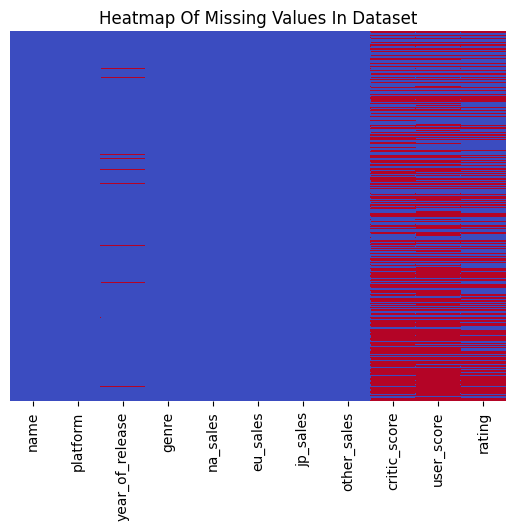

In [13]:
# Analyze patterns in missing values
print('Largest Emerging Pattern Stems From Japnsese Top Platforms')
print('Significant Rise In Missing Values After 1994')
missing_df = games_df[games_df.isna().any(axis=1)]
print(games_df.isna().sum())
platform_missing = missing_df['platform'].value_counts()
print(platform_missing)
genre_missing = missing_df['genre'].value_counts()
print(genre_missing)
year_missing = missing_df['year_of_release'].value_counts().sort_index()
print(year_missing)
sns.heatmap(games_df.isna(), cbar=False, yticklabels=False, cmap='coolwarm')
plt.title('Heatmap Of Missing Values In Dataset')
plt.show()


In [14]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy
print(games_df.shape)
print(games_df.head())

(16715, 11)
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      E  
1      3.58      6.81         0.77           NaN         NaN    NaN  
2     12.76      3.79         3.29          82.0         8.3      E  
3     10.93      3.28         2.95          80.0         8.0      E  
4      8.89     10.22         1.00           NaN         NaN    NaN  


In [15]:
# Why do you think the values are missing? Give possible reasons.
print('My Theory On Values Missing Is That It Stems From The Majority Of Missing Values Being From Nitendeo And Playstation (Japanese Own Businesses); Totaling 7,126.')
print('Gathering Data Since The Gaming Industrys Boom Since 1994 Might Become More Difficult')
print('Also Considering Japans Culture For Being Polite, Residents Might Be Less Likely To Leave A Review If With A Lower Score')
print('Seeing That The More Favored Genres Like Puzzles Have Less Missing Values, This Might Appear True')
# Explain why you filled in the missing values as you did or why you decided to leave them blank.
print()
print('I Decided Not To Fill In The Missing Values And To Leave As Is As Not To Misrepresent the Data When It Comes To Scores And Rating')

My Theory On Values Missing Is That It Stems From The Majority Of Missing Values Being From Nitendeo And Playstation (Japanese Own Businesses); Totaling 7,126.
Gathering Data Since The Gaming Industrys Boom Since 1994 Might Become More Difficult
Also Considering Japans Culture For Being Polite, Residents Might Be Less Likely To Leave A Review If With A Lower Score
Seeing That The More Favored Genres Like Puzzles Have Less Missing Values, This Might Appear True

I Decided Not To Fill In The Missing Values And To Leave As Is As Not To Misrepresent the Data When It Comes To Scores And Rating


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

You've been doing an awesome job!
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

Having a high number of missing values has an explanation and doesn't mean the data is unusable! You can handle all the data without removing those rows, just consider the missing values in your analysis!

Also wouldn't personally recommend dropping 50%+ of your rows unless they are missing crucial data(like name, year of release or maybe genre).
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Hey great job avoiding to drop missing values! Your effort is really appreciated and I believe your reasoning is sound



</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2:</b> </a>

It is actually preferable to have preserve all the rows that contain missing values in the user_score and critic_score columns!

Take into account those rows still have sales data, and if those are dropped then we end up missing information in our analysis of the trends of games, genres and sales!

### What is necessary to pass this part?

To continue progressing, I'd like you to define `games_df` as exactly what it is right now, but without removing rows that contain missing values in the user_score, critic_score and rating columns!

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

Looking great, appreciate the reasoning!

</div>

### 2.4 Calculate Total Sales

In [16]:
# Calculate total sales across all regions and put them in a different column
games_df['total_sales'] = (games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales'])
print(games_df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

Applying this change would modify the results of your analysis! let's continue after you update that logic!!
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2:</b> </a>

Your plots and data looks awesome, but let's try to avoid excluding the rows with missing values in the user_score, critic_score and rating columns!

</div>

My Apologies. I Think It May Have Been My Connection, But when I Restarted My Kernel And Ran All My Cells. Part Of My Progress Wasn't Saved.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

No worries! That definitely can happen! Data looking great now aswell!

</div>

# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [17]:
# Create a DataFrame with game releases by year
releases_by_year = games_df.groupby('year_of_release').size().reset_index(name='num_releases')

print(releases_by_year.head())

   year_of_release  num_releases
0             1980             9
1             1981            46
2             1982            36
3             1983            17
4             1984            14


Text(0, 0.5, 'Number Of Games Released')

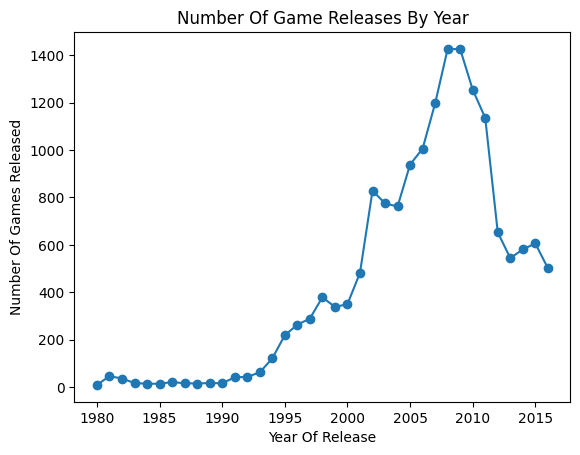

In [18]:
# Visualize the distribution of games across years
plt.plot(releases_by_year['year_of_release'], releases_by_year['num_releases'], marker='o')
plt.title('Number Of Game Releases By Year')
plt.xlabel('Year Of Release')
plt.ylabel('Number Of Games Released')

In [19]:
# Display summary statistics for each year
summary_by_year = games_df.groupby('year_of_release').agg({'total_sales':'sum', 'critic_score': 'mean', 'user_score': 'mean'}).reset_index()

print(summary_by_year.head())

   year_of_release  total_sales  critic_score  user_score
0             1980        11.38           NaN         NaN
1             1981        35.68           NaN         NaN
2             1982        28.88           NaN         NaN
3             1983        16.80           NaN         NaN
4             1984        50.35           NaN         NaN


### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?

### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?

### Answers:
- 2005, 2006, 2007, 2008, 2009 Showed Significant Spikes In Number Of Games Released
- Retracements After 400, 800, And 1400. Signifying Doubling In Size Proceeded By Small Dip. Latest Dip Resembles The Same Dip At 800, So I Would Expect A Similar Spike Going Into The Next Year.
- In My Opninion There Is Enough Data. THis Is No Different From Looking At A Trading Chart.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

Looking great!
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v3:</b> </a>

Would love to see you take into account the questions above!

</div>

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [20]:
# Calculate total sales by platform and year
platform_sales = games_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
print(platform_sales.head)

<bound method NDFrame.head of      year_of_release platform  total_sales
0               1980     2600        11.38
1               1981     2600        35.68
2               1982     2600        28.88
3               1983     2600         5.84
4               1983      NES        10.96
..               ...      ...          ...
233             2016      PSV         4.25
234             2016      Wii         0.18
235             2016     WiiU         4.60
236             2016     X360         1.52
237             2016     XOne        26.15

[238 rows x 3 columns]>


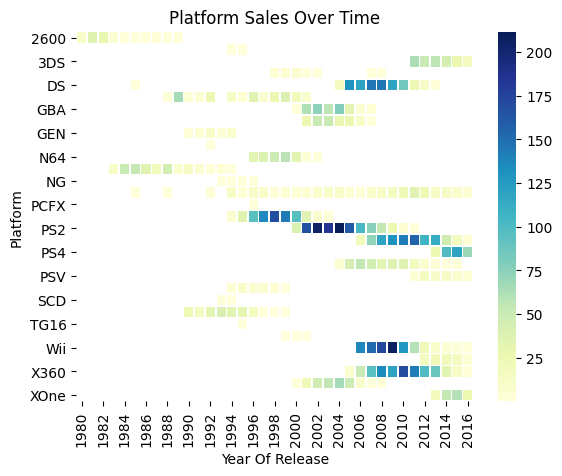

In [21]:
# Create a heatmap of platform sales over time
import seaborn as sns
sales_pivot = platform_sales.pivot(index='platform', columns='year_of_release', values='total_sales')
sns.heatmap(sales_pivot, cmap='YlGnBu', linewidths=0.5)
plt.title('Platform Sales Over Time')
plt.xlabel('Year Of Release')
plt.ylabel('Platform')
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

Visualization looking awesome!
</div>

In [22]:
# Identify platforms with declining sales
print("The heatmap highlights a clear lifecycle in platform sales: strong peaks during console generations", "followed by rapid decline as new hardware emerges. Handheld consoles; DS, 3DS, PSP, PSV show especially steep declines", "suggesting the rise of mobile gaming may have eaten into their market. Similarly, platforms like WiiU and PSV struggled to match the success of their predecessors.", "In contrast, PC maintains a consistent but relatively modest sales footprint across years.")

The heatmap highlights a clear lifecycle in platform sales: strong peaks during console generations followed by rapid decline as new hardware emerges. Handheld consoles; DS, 3DS, PSP, PSV show especially steep declines suggesting the rise of mobile gaming may have eaten into their market. Similarly, platforms like WiiU and PSV struggled to match the success of their predecessors. In contrast, PC maintains a consistent but relatively modest sales footprint across years.


### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

Appreciate the comments!

</div>

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

(11234, 12)
2001 2011


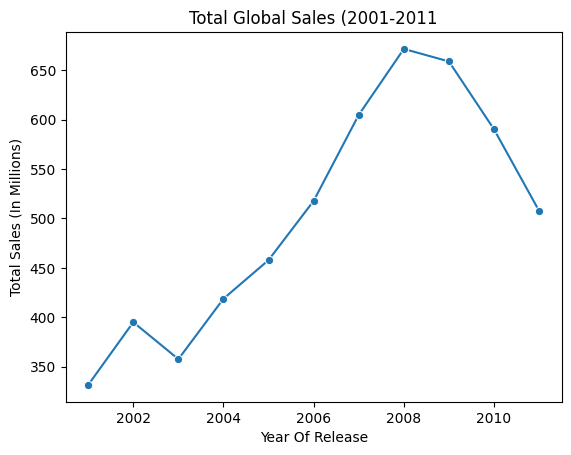

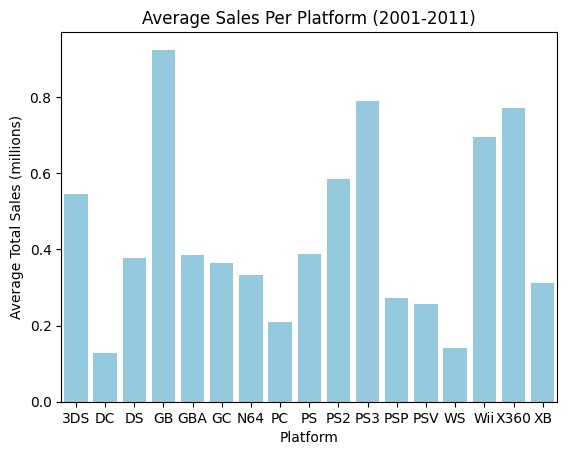

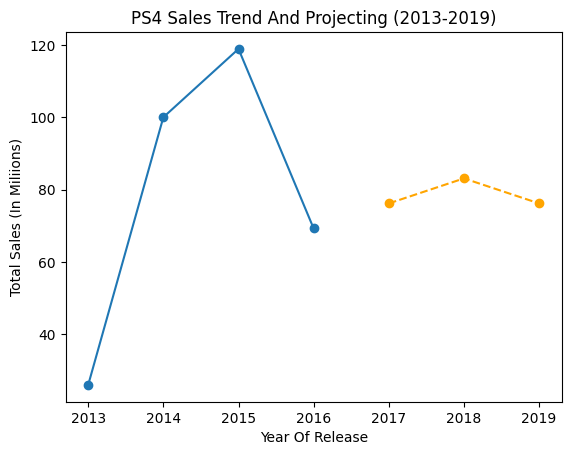


Based on the analysis of 2001–2011 sales trends, we can project that 2017 will 
continue to see growth for the PS4. Historically, consoles peak in sales around 
5–7 years after launch. Since PS4 launched in 2013 and has been growing steadily 
for 3 years, we can expect 2–4 more years of rising sales before reaching its peak. 

In contrast, WiiU and Xbox One show weak performance compared to their predecessors, 
suggesting they will not drive significant growth in 2017. PC remains consistent 
but modest. Therefore, PS4 is the most reliable driver of 2017 sales projections, 
with the potential for continued momentum until its lifecycle peak.



In [23]:
# Your code here to filter the dataset to relevant years
#Years
start, end = 2001, 2011

# Filter To Relevant Period
df_relevant = games_df.loc[games_df['year_of_release'].between(start, end)].copy()
print(df_relevant.shape)
print(df_relevant['year_of_release'].min(), df_relevant['year_of_release'].max())
# Justify your choice with data
yearly_sales = df_relevant.groupby('year_of_release')['total_sales'].sum().reset_index()
sns.lineplot(data=yearly_sales, x='year_of_release', y='total_sales', marker='o')
plt.title('Total Global Sales (2001-2011')
plt.xlabel('Year Of Release')
plt.ylabel('Total Sales (In Millions)')
plt.show()

platform_avg = df_relevant.groupby('platform')['total_sales'].mean().reset_index()
sns.barplot(data=platform_avg, x='platform', y='total_sales', color='skyblue')
plt.title('Average Sales Per Platform (2001-2011)')
plt.xlabel('Platform')
plt.ylabel('Average Total Sales (millions)')
plt.show()

ps4_data = games_df[games_df['platform'] == 'PS4']
ps4_sales_by_year = ps4_data.groupby('year_of_release')['total_sales'].sum()
ps4_sales = ps4_sales_by_year.loc[2013:2016]
projection_years = [2017, 2018, 2019]
projection_values = [ps4_sales.values[-1] * 1.1,
                     ps4_sales.values[-1] * 1.2,
                     ps4_sales.values[-1] * 1.1]
plt.plot(ps4_sales.index, ps4_sales.values, marker='o', label='PS4 Actual (2013-2016')
plt.plot(projection_years, projection_values, marker='o', linestyle='--', color='orange', label='Projected (2017-2019)')
plt.title('PS4 Sales Trend And Projecting (2013-2019)')
plt.xlabel('Year Of Release')
plt.ylabel('Total Sales (In Miliions)')
plt.show()

print("""
Based on the analysis of 2001–2011 sales trends, we can project that 2017 will 
continue to see growth for the PS4. Historically, consoles peak in sales around 
5–7 years after launch. Since PS4 launched in 2013 and has been growing steadily 
for 3 years, we can expect 2–4 more years of rising sales before reaching its peak. 

In contrast, WiiU and Xbox One show weak performance compared to their predecessors, 
suggesting they will not drive significant growth in 2017. PC remains consistent 
but modest. Therefore, PS4 is the most reliable driver of 2017 sales projections, 
with the potential for continued momentum until its lifecycle peak.
""")


<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

Visualizations looks good!

</div>

### Document Your Decision:
- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [24]:
# Analyze platform sales trends
print("""My analysis of platforms has brought me to the conclusion that PlayStation consoles (PS2, PS3, PS4) consistently show the strongest rise in sales, with each generation gaining momentum before eventually tapering off. This makes PlayStation the most reliable indicator for projecting future sales.

Nintendo platforms (Wii, WiiU, DS, 3DS) show bursts of success followed by steep declines, suggesting shorter lifespans compared to PlayStation. Xbox (X360, XOne) performs moderately well but shows less long-term momentum, while PC sales remain stable but relatively flat.

Based on these patterns, the PS4 stands out: it has been on the rise for three years, and given the typical 5–7 year console lifecycle observed in previous generations, it is likely to grow for another 2–4 years before peaking. This makes PS4 the most promising platform to focus on when projecting 2017 sales.""")



My analysis of platforms has brought me to the conclusion that PlayStation consoles (PS2, PS3, PS4) consistently show the strongest rise in sales, with each generation gaining momentum before eventually tapering off. This makes PlayStation the most reliable indicator for projecting future sales.

Nintendo platforms (Wii, WiiU, DS, 3DS) show bursts of success followed by steep declines, suggesting shorter lifespans compared to PlayStation. Xbox (X360, XOne) performs moderately well but shows less long-term momentum, while PC sales remain stable but relatively flat.

Based on these patterns, the PS4 stands out: it has been on the rise for three years, and given the typical 5–7 year console lifecycle observed in previous generations, it is likely to grow for another 2–4 years before peaking. This makes PS4 the most promising platform to focus on when projecting 2017 sales.


In [25]:
# Sort platforms by total sales
relevant_data = games_df[(games_df['year_of_release'] >= 2001) & (games_df['year_of_release'] <= 2011)]
platform_totals = relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_totals)

platform
PS2     1194.39
Wii      855.81
DS       790.21
X360     724.70
PS3      642.55
GBA      312.81
PSP      278.34
XB       250.58
GC       196.73
PC       138.41
3DS       63.20
PS        44.33
GB         9.24
PSV        4.63
N64        3.33
DC         1.42
WS         0.28
Name: total_sales, dtype: float64


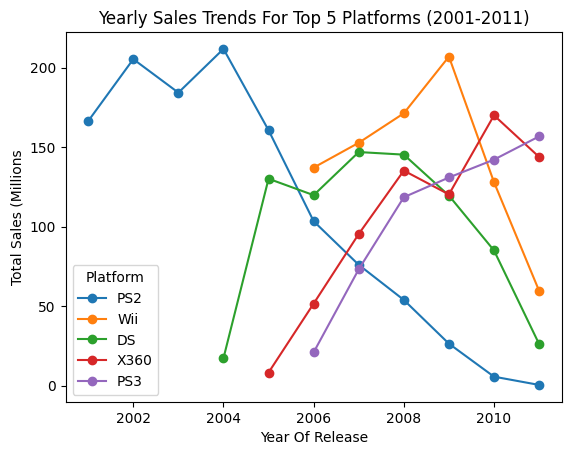

In [26]:
# Visualize top platforms
platform_yearly = relevant_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
top_platforms = platform_yearly.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index
for platform in top_platforms:
    subset = platform_yearly[platform_yearly['platform'] == platform]
    plt.plot(subset['year_of_release'], subset['total_sales'], marker='o', label=platform)
plt.title('Yearly Sales Trends For Top 5 Platforms (2001-2011)')
plt.xlabel('Year Of Release')
plt.ylabel('Total Sales (Millions')
plt.legend(title='Platform')
plt.show()
# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

Code looking good! visualization looks pretty nice!

</div>

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

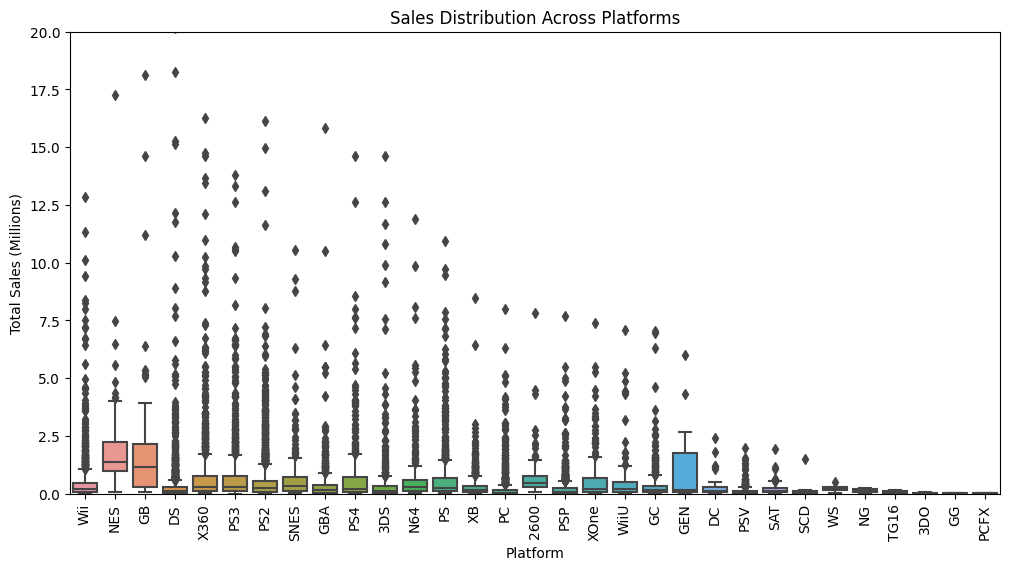

In [27]:
# Create box plot of sales by platform
plt.figure(figsize=(12,6))
sns.boxplot(x='platform', y='total_sales', data=games_df)
plt.ylim(0,20)
plt.xticks(rotation=90)
plt.title('Sales Distribution Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions)')
plt.show()

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v3:</b> </a>

Looks like you have some pretty crazy outliers! it can make the visualization hard to read and blur the story you may want to tell!

Recommend using a `ylim`!

</div>

In [28]:
# Calculate detailed statistics for each platform
platform_stats = games_df.groupby('platform')['total_sales'].describe()
print(platform_stats)

           count      mean       std   min     25%    50%     75%    max
platform                                                                
2600       133.0  0.729173  0.917799  0.07  0.3000  0.460  0.7800   7.81
3DO          3.0  0.033333  0.023094  0.02  0.0200  0.020  0.0400   0.06
3DS        520.0  0.498077  1.430876  0.01  0.0500  0.120  0.3300  14.60
DC          52.0  0.306731  0.468660  0.02  0.0775  0.135  0.2975   2.41
DS        2151.0  0.374765  1.426451  0.01  0.0500  0.110  0.2700  29.80
GB          98.0  2.606735  5.365478  0.06  0.3025  1.165  2.1650  31.38
GBA        822.0  0.386679  0.896897  0.01  0.0525  0.160  0.3900  15.84
GC         556.0  0.357788  0.686346  0.01  0.0600  0.150  0.3525   7.06
GEN         29.0  1.061034  1.470645  0.03  0.0700  0.150  1.7600   6.02
GG           1.0  0.040000       NaN  0.04  0.0400  0.040  0.0400   0.04
N64        319.0  0.685517  1.316733  0.01  0.1350  0.270  0.5950  11.90
NES         98.0  2.561735  5.108012  0.06  1.0000 

## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [29]:
# Choose a popular platform based on your previous analysis
print(ps4_data.head(5))

                              name platform  year_of_release    genre  \
31       Call of Duty: Black Ops 3      PS4             2015  Shooter   
42              Grand Theft Auto V      PS4             2014   Action   
77                         FIFA 16      PS4             2015   Sports   
87    Star Wars Battlefront (2015)      PS4             2015  Shooter   
92  Call of Duty: Advanced Warfare      PS4             2014  Shooter   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
31      6.03      5.86      0.36         2.38           NaN         NaN   
42      3.96      6.31      0.38         1.97          97.0         8.3   
77      1.12      6.12      0.06         1.28          82.0         4.3   
87      2.99      3.49      0.22         1.28           NaN         NaN   
92      2.81      3.48      0.14         1.23          83.0         5.7   

   rating  total_sales  
31    NaN        14.63  
42      M        12.62  
77      E         8.58  
87    NaN 

In [30]:
# Create scatter plots for both critic and user scores

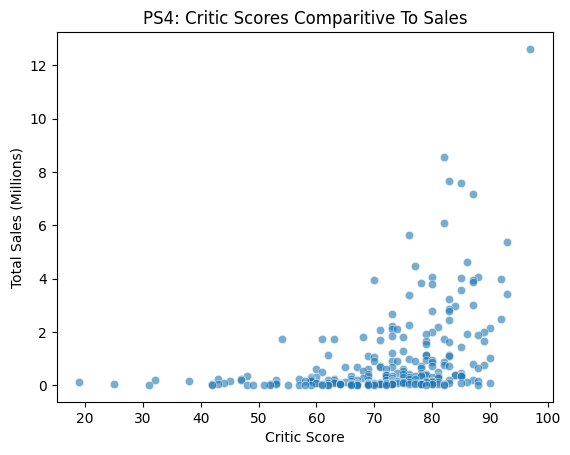

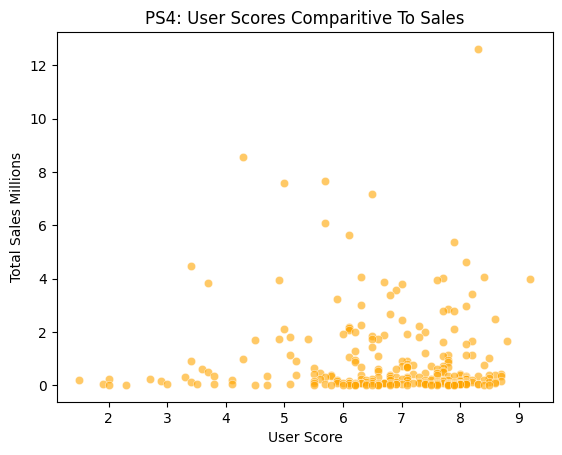

Correlation Between Critic Scores And Sales (PS4): 0.40656790206178095
Correlation Between User Scores And Sales (PS4): -0.031957110204556376


In [31]:
# Critic Scores
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data, alpha=0.6)
plt.title('PS4: Critic Scores Comparitive To Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (Millions)')
plt.show()

# User Scores
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data, alpha=0.6, color='orange')
plt.title('PS4: User Scores Comparitive To Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales Millions')
plt.show()

# Calculate correlations

print("Correlation Between Critic Scores And Sales (PS4):", ps4_data['critic_score'].corr(ps4_data['total_sales']))
print("Correlation Between User Scores And Sales (PS4):", ps4_data['user_score'].corr(ps4_data['total_sales']))

Based On Visualizations, There Is A Stronger Correlation Between Crtic Scores Than User Scores. With Highest Sales With User Score Actually Being 4 And Then Having A Slow Decline From 8 Miliin In Sales To 4 Million In Sales At A User Score Of 9. Whereas Critic Score Has A Exponential Curve Of 2 Million In Sales At A Critic Score Of 50 With A Rise To 12-13 Million With A Score Of 97.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

Awesome job, visualizations looking great! Nice to see the correlations!

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v3:</b> </a>

Would like to see your thoughts on these graphs and the correlations! what can you interpret from these?

</div>

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [32]:
# Find games released on multiple platforms
multi_platform_games = games_df.groupby('name').filter(lambda x: x['platform'].nunique() > 1)
print(multi_platform_games.head())

                             name platform  year_of_release     genre  \
1               Super Mario Bros.      NES             1985  Platform   
5                          Tetris       GB             1989    Puzzle   
16             Grand Theft Auto V      PS3             2013    Action   
17  Grand Theft Auto: San Andreas      PS2             2004    Action   
18              Super Mario World     SNES             1990  Platform   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1      29.08      3.58      6.81         0.77           NaN         NaN   
5      23.20      2.26      4.22         0.58           NaN         NaN   
16      7.02      9.09      0.98         3.96          97.0         8.2   
17      9.43      0.40      0.41        10.57          95.0         9.0   
18     12.78      3.75      3.54         0.55           NaN         NaN   

   rating  total_sales  
1     NaN        40.24  
5     NaN        30.26  
16      M        21.05  
17      M 

                                name platform  total_sales
6326               Super Mario Bros.      NES        40.24
6528                          Tetris       GB        30.26
2480              Grand Theft Auto V      PS3        21.05
2489   Grand Theft Auto: San Andreas      PS2        20.81
6330               Super Mario World     SNES        20.62
6328             Super Mario Bros. 3      NES        17.28
2482              Grand Theft Auto V     X360        16.27
2493     Grand Theft Auto: Vice City      PS2        16.15
970   Call of Duty: Modern Warfare 3     X360        14.73
945        Call of Duty: Black Ops 3      PS4        14.63
942          Call of Duty: Black Ops     X360        14.62
949       Call of Duty: Black Ops II      PS3        13.79
951       Call of Duty: Black Ops II     X360        13.68
966   Call of Duty: Modern Warfare 2     X360        13.47
968   Call of Duty: Modern Warfare 3      PS3        13.33
2475            Grand Theft Auto III      PS2        13.

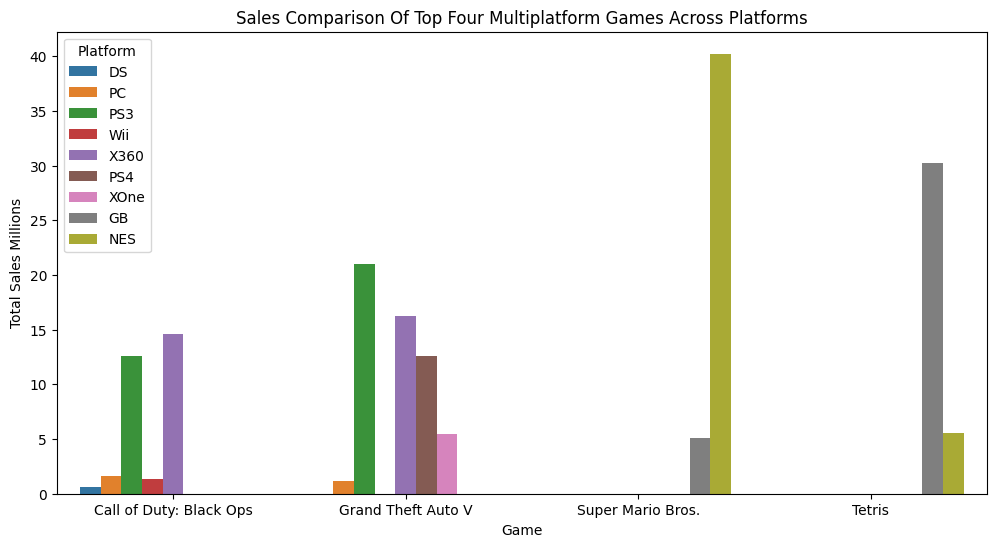

In [33]:
# Compare sales across platforms for these games
cross_platform_sales = multi_platform_games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
print(cross_platform_sales.sort_values(by='total_sales', ascending=False).head(20))
# Your code here to analyze and visualize cross-platform performance
game_platform_sales = multi_platform_games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
top_games = game_platform_sales.groupby('name')['total_sales'].sum().nlargest(4).index
top_game_sales = game_platform_sales[game_platform_sales['name'].isin(top_games)]
plt.figure(figsize=(12,6))
sns.barplot(data=top_game_sales, x='name', y='total_sales', hue='platform')
plt.title('Sales Comparison Of Top Four Multiplatform Games Across Platforms')
plt.ylabel('Total Sales Millions')
plt.xlabel('Game')
plt.legend(title='Platform')
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

I like what I see!

</div>

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [34]:
# Analyze genre performance

genre_sales = games_df.groupby('genre')['na_sales', 'jp_sales', 'eu_sales', 'other_sales', 'total_sales'].sum()
print(genre_sales)


              na_sales  jp_sales  eu_sales  other_sales  total_sales
genre                                                               
Action          879.01    161.43    519.13       184.60      1744.17
Adventure       105.26     52.30     63.54        16.49       237.59
Fighting        223.36     87.48    100.33        36.36       447.53
Misc            407.27    108.11    212.74        74.39       802.51
Platform        445.50    130.83    200.35        51.09       827.77
Puzzle          122.87     57.31     50.01        12.38       242.57
Racing          359.35     56.71    236.51        76.10       728.67
Role-Playing    330.81    355.41    188.71        59.63       934.56
Shooter         592.24     38.76    317.34       104.11      1052.45
Simulation      181.92     63.80    113.52        30.73       389.97
Sports          684.43    135.54    376.79       134.51      1331.27
Strategy         68.55     49.66     45.17        10.85       174.23


In [35]:
# Sort genres by total sales
genre_total_sales = games_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genre_total_sales)


genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64


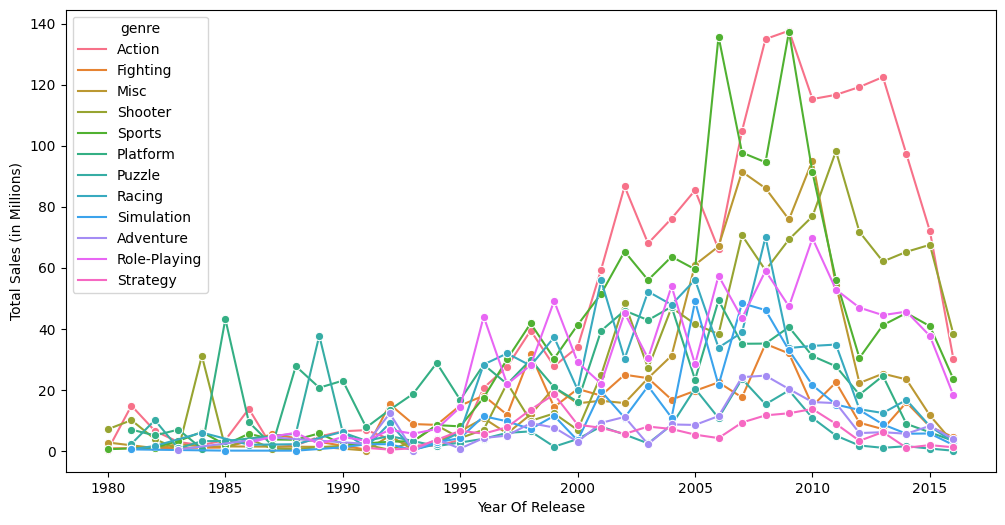

In [36]:
# Visualize genre distribution
genre_trends = games_df.groupby(['year_of_release', 'genre'])['total_sales'].sum().reset_index()
plt.figure(figsize=(12,6))

sns.lineplot(data=genre_trends, x='year_of_release', y='total_sales', hue='genre', marker='o')
plt.xlabel('Year Of Release')
plt.ylabel('Total Sales (in Millions)')
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

Very cool looking plot! 

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v3:</b> </a>

Maybe it would be easier to distinguish trends and track each genre's growth to have lines connecting each dot!

</div>

In [37]:
# Calculate market share for each genre
genre_sales['market_share'] = (genre_sales['total_sales'] / genre_sales['total_sales'].sum()) * 100
genre_sales = genre_sales.sort_values(by='market_share', ascending=False)
print(genre_sales[['total_sales', 'market_share']])

              total_sales  market_share
genre                                  
Action            1744.17     19.568195
Sports            1331.27     14.935787
Shooter           1052.45     11.807649
Role-Playing       934.56     10.485017
Platform           827.77      9.286919
Misc               802.51      9.003522
Racing             728.67      8.175096
Fighting           447.53      5.020929
Simulation         389.97      4.375152
Puzzle             242.57      2.721442
Adventure          237.59      2.665570
Strategy           174.23      1.954722


### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

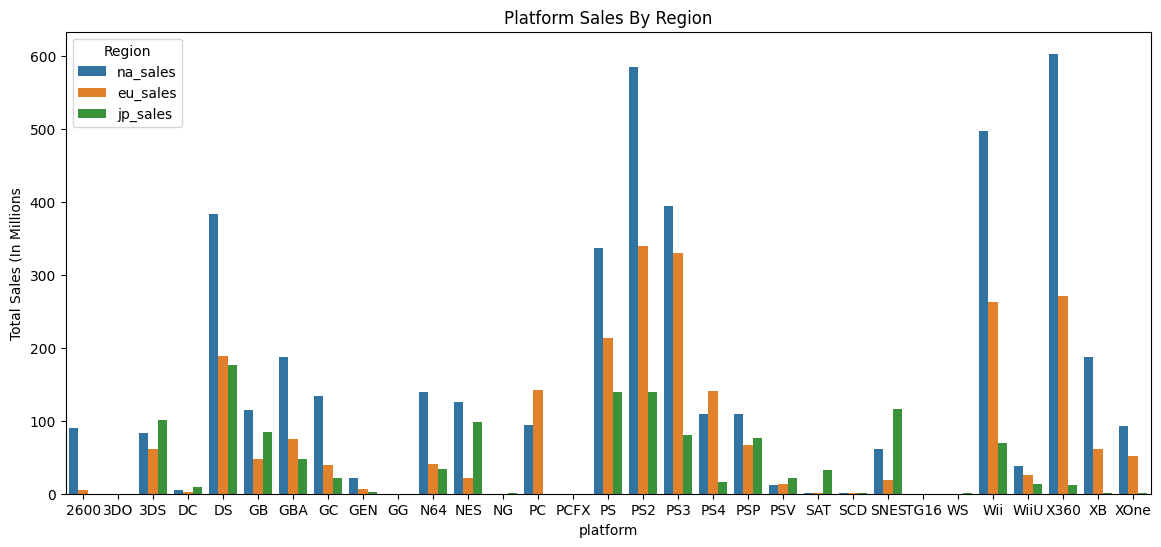

In [38]:
# Function to analyze platform performance by region
def analyze_region(region_col):
    print(f'--- Analysis For {region_col.upper()} ---\n')
# Platform Preferences
    region_sales = games_df.groupby('platform')[region_col].sum().sort_values(ascending=False)
    print('Top Platforms:')
    print(region_sales.head(5))
    print('\n')
    
# Genre Popularity
    region_genre_sales = games_df.groupby('genre')[region_col].sum().sort_values(ascending=False)
    print('Top Genres:')
    print(region_genre_sales.head(5))
    print('\n')

# ESRB Rating Impact
    rating_sales = games_df.groupby('rating')[region_col].sum().sort_values(ascending=False)
    print('Impact Of ESRB Ratings:')
    print(rating_sales)
    print('\n')

region_platform_sales = games_df.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
melted = region_platform_sales.melt(id_vars='platform', value_vars=['na_sales', 'eu_sales', 'jp_sales'], var_name='Region', value_name='Sales')

plt.figure(figsize=(14,6))
sns.barplot(data=melted, x='platform', y='Sales', hue='Region')

plt.title('Platform Sales By Region')
plt.ylabel('Total Sales (In Millions')
plt.show()

In [39]:
# Analyze each region
analyze_region('na_sales')
analyze_region('eu_sales')
analyze_region('jp_sales')


--- Analysis For NA_SALES ---

Top Platforms:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64


Top Genres:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64


Impact Of ESRB Ratings:
rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64


--- Analysis For EU_SALES ---

Top Platforms:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64


Top Genres:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64


Impact Of ESRB Ratings:
rating
E       710.25
M       483.97
T       427.03
E10+    188.52
AO        0.61
K-A       0.27
EC        0.11
RP        0.08
Name: eu_sales, dtype: float64


--- Analysi

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

Good job!

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v3:</b> </a>

I think it would be cool to visualize this information in a multiple bar chart!

</div>

### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [40]:
# Create a comparative platform analysis
cross_regional = games_df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Sort By Global Total To keep Top Performers Visible
cross_regional['global_sales'] = cross_regional.sum(axis=1)
cross_regional = cross_regional.sort_values('global_sales', ascending=False)

print(cross_regional.head(10))

          na_sales  eu_sales  jp_sales  global_sales
platform                                            
PS2         583.84    339.29    139.20       1062.33
X360        602.47    270.76     12.43        885.66
Wii         496.90    262.21     69.33        828.44
PS3         393.49    330.29     80.19        803.97
DS          382.40    188.89    175.57        746.86
PS          336.52    213.61    139.82        689.95
GBA         187.54     75.25     47.33        310.12
PS4         108.74    141.09     15.96        265.79
PSP         109.17     66.68     76.78        252.63
XB          186.69     60.95      1.38        249.02


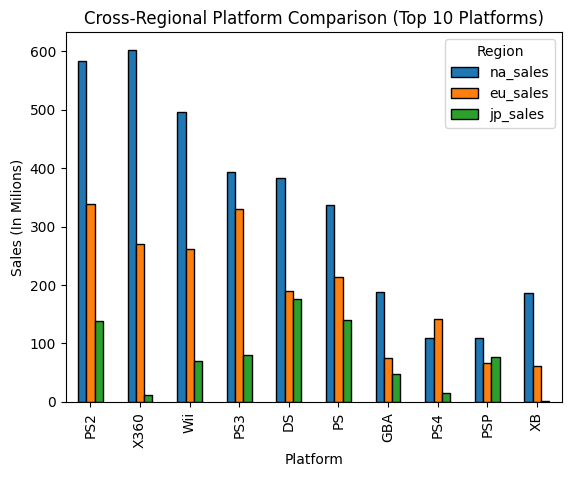

In [41]:
# Visualize cross-regional comparison for top platforms
cross_regional[['na_sales', 'eu_sales', 'jp_sales']].head(10).plot(kind='bar', edgecolor='black')
plt.title('Cross-Regional Platform Comparison (Top 10 Platforms)')
plt.ylabel('Sales (In Milions)')
plt.xlabel('Platform')
plt.legend(title='Region')
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

I like what i see!

</div>

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:


--- Genre Analysis NA_SALES ---

Top Genres:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64



--- Genre Analysis EU_SALES ---

Top Genres:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64



--- Genre Analysis JP_SALES ---

Top Genres:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64




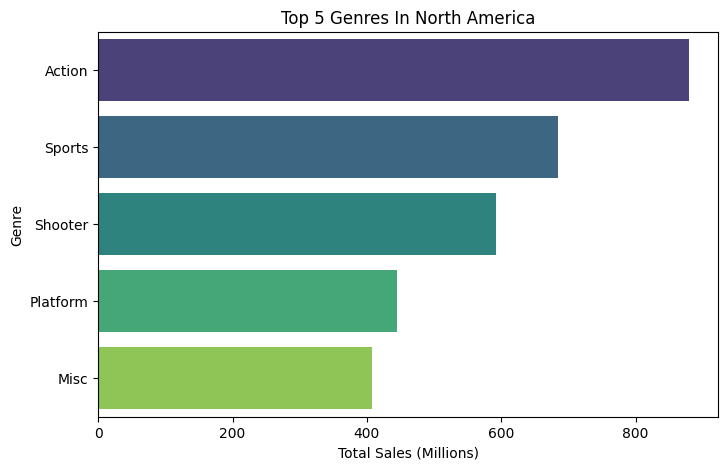

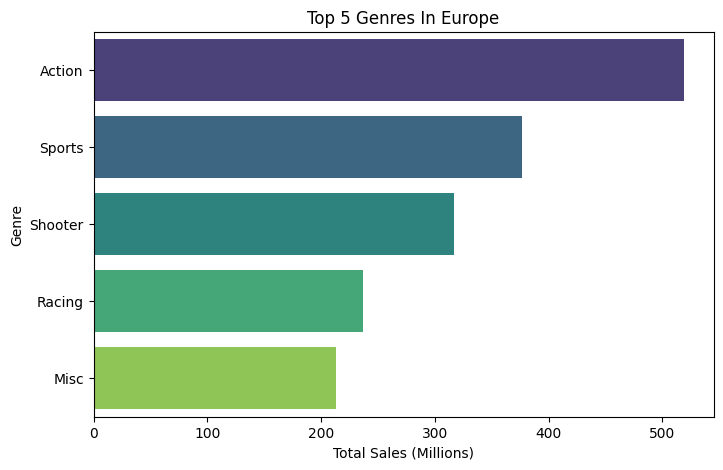

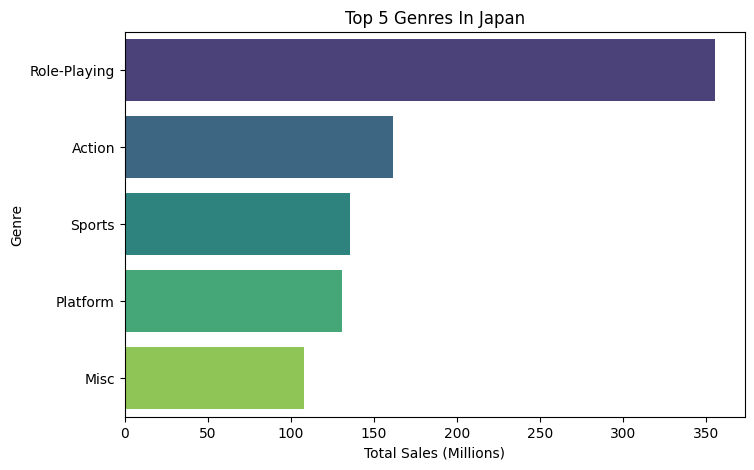

In [42]:
# Function to analyze genre performance by region
def analyze_genre_region(region_col):
    print(f'\n--- Genre Analysis {region_col.upper()} ---\n')

#Top genres by sales
    region_genre_sales = games_df.groupby('genre')[region_col].sum().sort_values(ascending=False)
    print('Top Genres:')
    print(region_genre_sales.head(5))
    print('\n')
    return region_genre_sales

na_genres = analyze_genre_region('na_sales')
eu_genres = analyze_genre_region('eu_sales')
jp_genres = analyze_genre_region('jp_sales')    

def plot_genre_sales(region_genre_sales, region_name):
    top_genres = region_genre_sales.sort_values(ascending=False).head(5)
    plt.figure(figsize=(8,5))
    sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
    plt.title(f'Top 5 Genres In {region_name}')
    plt.xlabel('Total Sales (Millions)')
    plt.ylabel('Genre')
    plt.show()

plot_genre_sales(na_genres, 'North America')
plot_genre_sales(eu_genres, 'Europe')
plot_genre_sales(jp_genres, 'Japan')

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

Looking good!

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v3:</b> </a>

A graph showcasing this info would be nice here aswell!

</div>

### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

In [43]:
# Create a comparative genre analysis
cross_genre = games_df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

#Add Global For Sorting
cross_genre['global_sales'] = cross_genre.sum(axis=1)
cross_genre = cross_genre.sort_values('global_sales', ascending=False)
print(cross_genre.head(10))

              na_sales  eu_sales  jp_sales  global_sales
genre                                                   
Action          879.01    519.13    161.43       1559.57
Sports          684.43    376.79    135.54       1196.76
Shooter         592.24    317.34     38.76        948.34
Role-Playing    330.81    188.71    355.41        874.93
Platform        445.50    200.35    130.83        776.68
Misc            407.27    212.74    108.11        728.12
Racing          359.35    236.51     56.71        652.57
Fighting        223.36    100.33     87.48        411.17
Simulation      181.92    113.52     63.80        359.24
Puzzle          122.87     50.01     57.31        230.19


## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [44]:
# Function to analyze ESRB rating impact
def analyze_rating_region(region_col):
    print(f'\n--- ESRB Rating Impact For {region_col.upper()} ---\n')

    rating_sales = games_df.groupby('rating')[region_col].sum().sort_values(ascending=False)
    print(rating_sales)
    print('\n')

    return rating_sales


--- ESRB Rating Impact For NA_SALES ---

rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64



--- ESRB Rating Impact For EU_SALES ---

rating
E       710.25
M       483.97
T       427.03
E10+    188.52
AO        0.61
K-A       0.27
EC        0.11
RP        0.08
Name: eu_sales, dtype: float64



--- ESRB Rating Impact For JP_SALES ---

rating
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
AO        0.00
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64




<Figure size 1000x600 with 0 Axes>

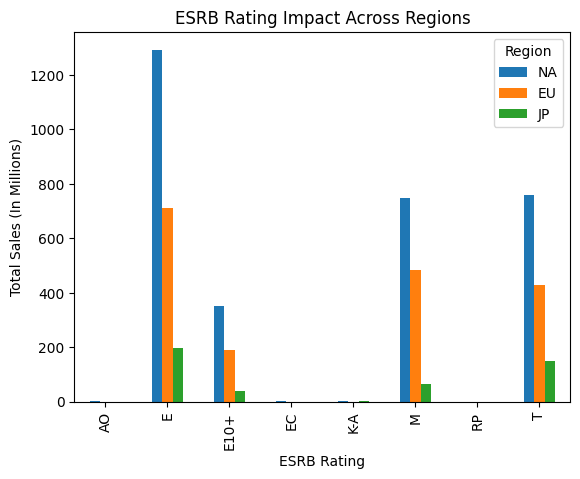

In [45]:
# Analyze ESRB impact for each region
na_ratings = analyze_rating_region('na_sales')
eu_ratings = analyze_rating_region('eu_sales')
jp_ratings = analyze_rating_region('jp_sales')

# For Visualization: Combine Ratings Into One Dataframe
rating_comparison = pd.DataFrame({'NA': na_ratings, 'EU': eu_ratings, 'JP': jp_ratings})

plt.figure(figsize=(10,6))
rating_comparison.plot(kind='bar')
plt.title('ESRB Rating Impact Across Regions')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (In Millions)')
plt.legend(title='Region')
plt.show()


<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

Looking good aswell!

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v3:</b> </a>

A comparison graph would be cool here too!

</div>

# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


In [46]:
alpha = 0.05
#Null Hypotethesis Is Always No Significant Difference, Aleternative States Significant Differenc
xone_scores = games_df.loc[games_df['platform'] == 'XOne', 'user_score']
pc_scores = games_df.loc[games_df['platform'] == 'PC', 'user_score']

#Isolated Platform Data From Xbox One And PC User Ratings Being Used For TTest Testing Hypothesis 
tstat1, pval1 = st.ttest_ind(xone_scores.dropna(), pc_scores.dropna(), equal_var=False)
print("""H₀ (Null Hypothesis): The average user ratings of games released on Xbox One and PC are the same.
Hₐ (Alternative Hypothesis): The average user ratings of games released on Xbox One and PC are different.""")
print('XOne vs PC')
print(' t-statistic =', tstat1, 'p-value =', pval1)
if pval1 < alpha:
    print(' Reject H0: Average User Rating For XBox One And PC Platforms Are Different')
else:
    print('Fail To Reject H0: Average User Rating For XBox One And PC Are The Same')

#Isolated Genre Data For Action And Sports Being Used For Ttest Testing Hypothesis
action_scores = games_df.loc[games_df['genre'] == 'Action', 'user_score']
sport_scores = games_df.loc[games_df['genre'] == 'Sports', 'user_score']

tstat2, pval2 = st.ttest_ind(action_scores.dropna(), sport_scores.dropna(), equal_var=False)
print()
print("""H₀ (Null Hypothesis): The average user ratings of Action games and Sports games are the same.
Hₐ (Alternative Hypothesis): The average user ratings of Action games and Sports games are different.""")
print('Action vs Sports:')
print(' t-statistic =', tstat2, 'p-value =', pval2)
if pval2 < alpha:
    print('Reject H0: Average User Ratings For The Action And Sports Genre Are Different')
else:
    print('Fail To Reject H0: Average User Rating For The Action And Sports Are The Same')

H₀ (Null Hypothesis): The average user ratings of games released on Xbox One and PC are the same.
Hₐ (Alternative Hypothesis): The average user ratings of games released on Xbox One and PC are different.
XOne vs PC
 t-statistic = -4.653422798410771 p-value = 4.935072360183574e-06
 Reject H0: Average User Rating For XBox One And PC Platforms Are Different

H₀ (Null Hypothesis): The average user ratings of Action games and Sports games are the same.
Hₐ (Alternative Hypothesis): The average user ratings of Action games and Sports games are different.
Action vs Sports:
 t-statistic = 1.57746791633354 p-value = 0.11483818791498286
Fail To Reject H0: Average User Rating For The Action And Sports Are The Same


<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

Hypothesis testing looking good!

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v3:</b> </a>

One thing we consider very important is to define what does the null hypothesis and the alternative hypothesis mean exactly!

```
H0: definition of the null hypothesis
HA: definition of the alternative hypothesis
```

We care about the precision of the definition, though it can be concise!

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v4:</b> </a>

Looking awesome!
    
</div>

# Step 6. Write a general conclusion


# ===============================================
# Step 6: General Conclusion (Stakeholder Report)
# ===============================================

Our analysis of video game sales reveals several important insights into platform performance, 
genre popularity, regional preferences, and the influence of ratings and reviews. At the platform level, 
the PlayStation 2 and Xbox 360 stand out as global leaders, with the PlayStation brand dominating in Europe, 
Xbox excelling in North America, and Nintendo maintaining its stronghold in Japan. This demonstrates that 
global success requires not only strong overall sales but also sensitivity to regional loyalties and 
preferences. 

In terms of genre performance, Action, Sports, and Shooter titles lead worldwide sales, while Japan 
clearly diverges with Role-Playing Games emerging as the dominant genre. This cultural divide highlights 
the importance of tailoring publishing strategies to regional tastes. The sales distribution also shows that 
family-friendly genres have long-term staying power, while niche genres such as Puzzle and Strategy remain 
consistent but relatively limited in scope. 

When analyzing the impact of ESRB ratings, the results indicate that E-rated games, which appeal to the 
broadest audiences, perform best overall, while Teen and Mature-rated titles also succeed in North America 
and Europe. Conversely, Adults Only and Rating Pending categories show almost no market impact, confirming 
that mainstream accessibility remains critical to success. 

The influence of reviews further demonstrates that critic scores are a more reliable predictor of sales than 
user scores. On the PlayStation 4, critic reviews showed a moderate positive correlation with sales, while 
user reviews showed virtually no relationship. This suggests that marketing and sales are more directly 
impacted by professional reviews than by general consumer ratings. 

Finally, hypothesis testing confirmed significant differences in user ratings between Xbox One and PC 
platforms, while no significant difference was found between the Action and Sports genres despite their 
sales differences. This reinforces the idea that sales performance is shaped more by platform reach, 
cultural preference, and critic influence than by differences in user perception alone. 

Taken together, these findings show that success in the gaming industry depends on a balance of global 
reach and regional strategy. To remain competitive, stakeholders must align their portfolios with both 
worldwide bestsellers and region-specific preferences, leverage the weight of critic reviews, and carefully 
consider ESRB rating impacts when targeting broad audiences. In short, the most sustainable strategies are 
those that respect cultural diversity, prioritize accessibility, and amplify the role of critical reception 
in shaping demand.


<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

Like the conclusion, reasoning is sound and your analysis is overall looking awesome!!

</div>